# 문제 1번

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv('dataset/1회차 인증 실기 1번.csv')



X1     28
X2      0
X3     14
X4      0
X5     24
X6      0
X7     16
X8      0
X9     22
X10     0
X11    21
X12    22
X13     0
X14     0
X15     0
X16     0
X17    13
X18    18
X19     0
X20    21
dtype: int64


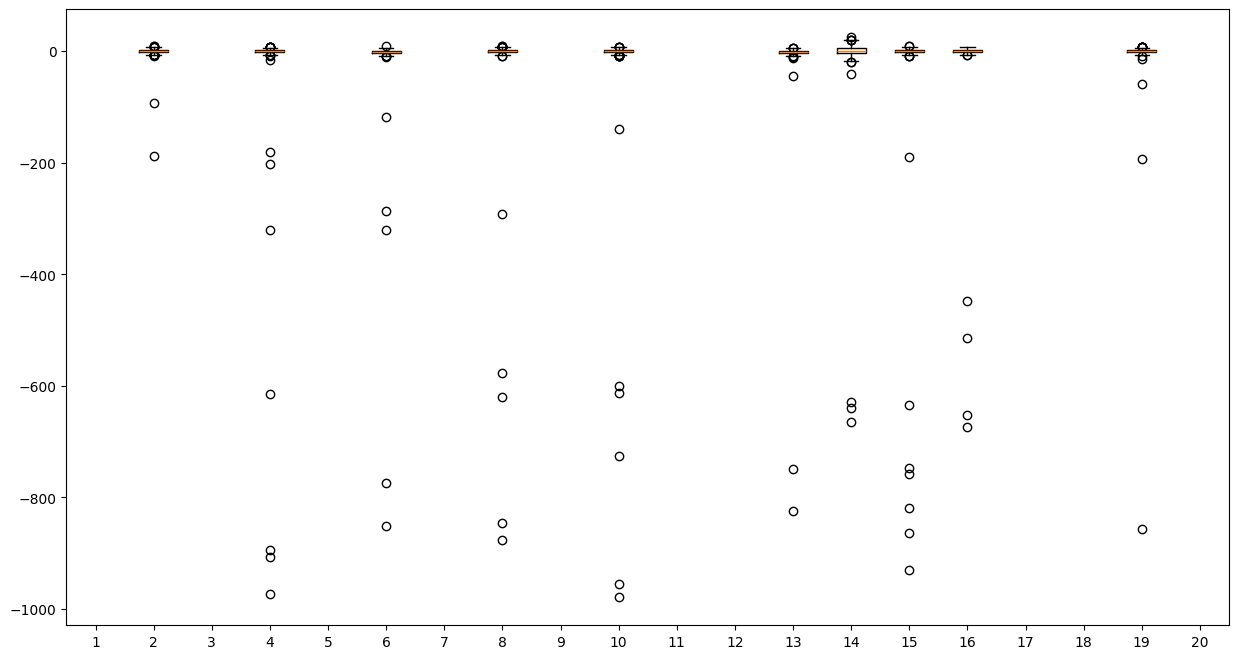

In [29]:
# (a)
print(data.isna().sum())

plt.figure(figsize =(15,8))
plt.boxplot(data)
plt.show()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
dtype: int64


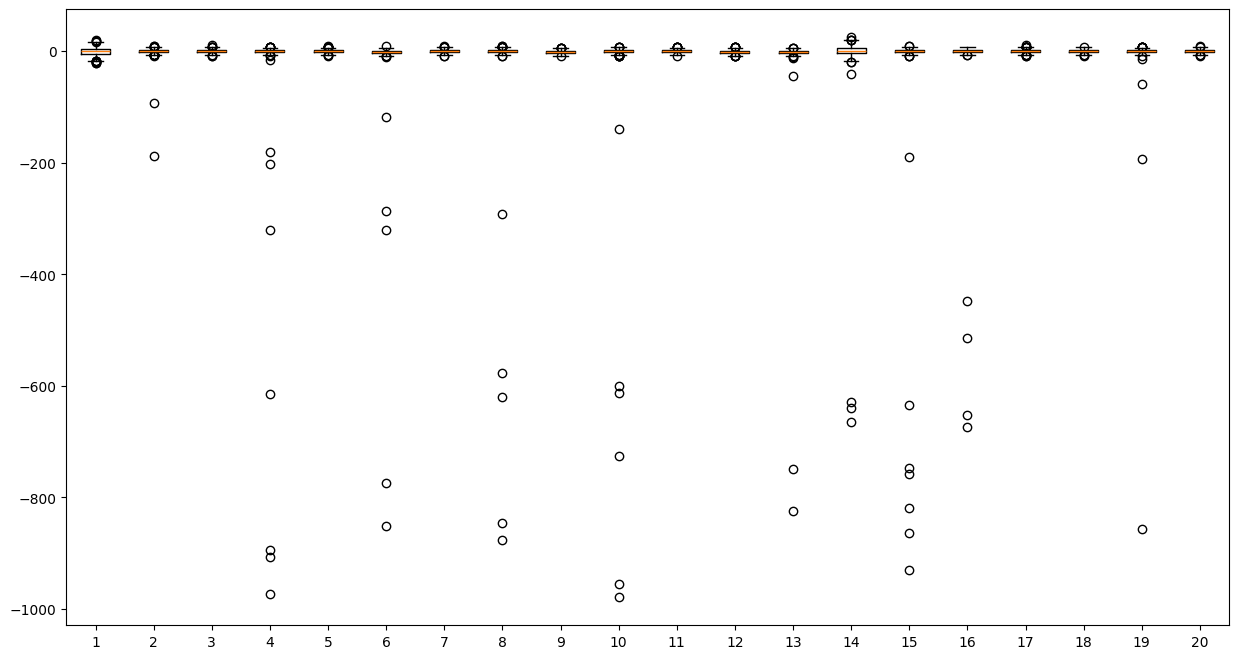

In [30]:
# (b)
data.fillna(data.median(), inplace=True)
print(data.isna().sum())

plt.figure(figsize =(15,8))
plt.boxplot(data)
plt.show()

In [49]:
# (c)

from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest()
iso_forest.fit(data)

y_pred = iso_forest.predict(data)

data_r1 = data[y_pred==1].copy()

원본 data 개수 1000, isolation forest 후 data 개수 994


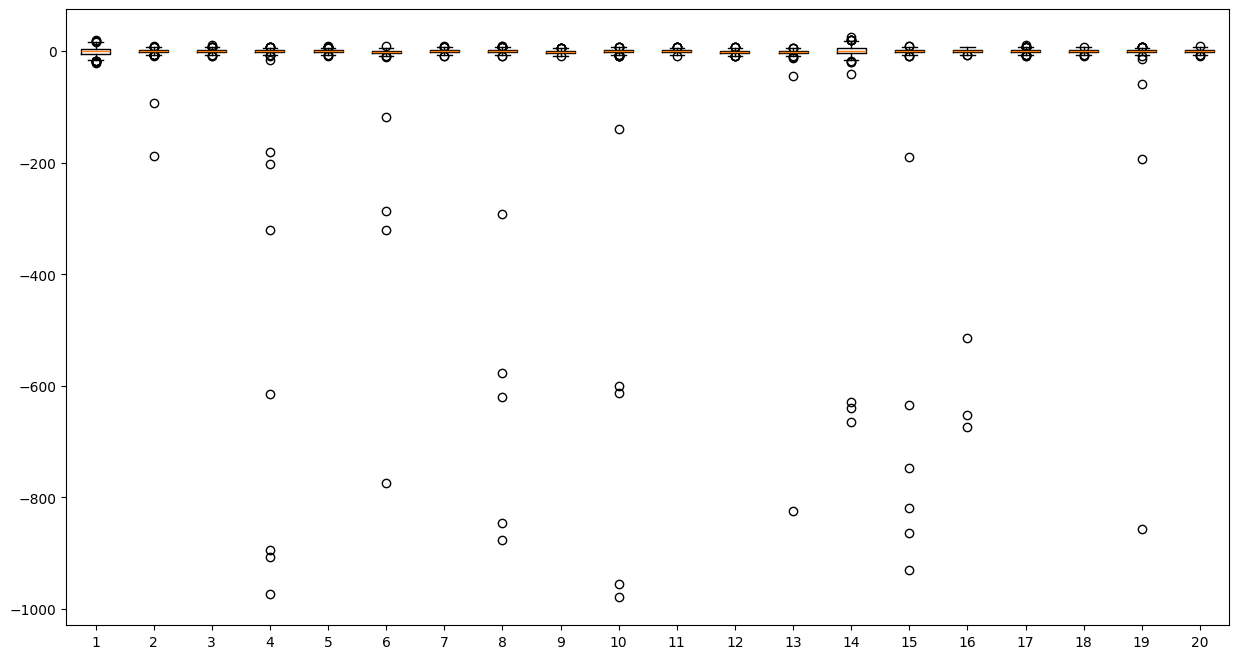

In [55]:
# (d)

print(f"원본 data 개수 {len(data)}, isolation forest 후 data 개수 {len(data_r1)}")

plt.figure(figsize =(15,8))
plt.boxplot(data_r1)
plt.show()

# 2번 문제

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv('dataset/1회차 인증 실기 2번.csv')

In [59]:
Train_data = data[data['테스트'] == 0]
Test_data = data[data['테스트'] == 2]

In [74]:
Y_train = Train_data['y'].values
X_train = Train_data.drop(['y','테스트'], axis=1)

Y_test = Test_data['y'].values
X_test = Test_data.drop(['y','테스트'], axis=1)

In [80]:
#(a)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

lr = LinearRegression()
lr.fit(X_train, Y_train)

y_predict = lr.predict(X_test)
r2_score(y_predict, Y_test)


0.5011727601263838

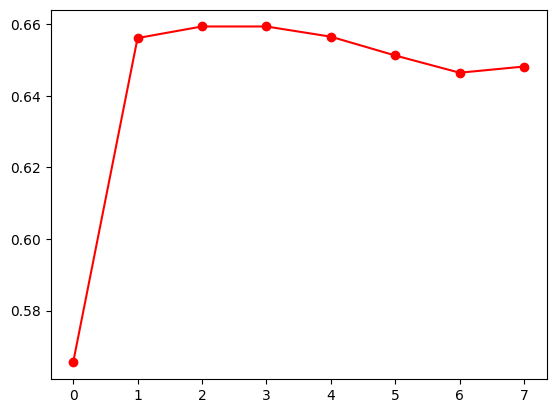

In [105]:
#(b)

from sklearn.linear_model import Ridge

r2_list = []

X_train_r1, X_test_r1, Y_train_r1, Y_test_r1 = train_test_split(X_train, Y_train,test_size=0.3,random_state=0) 
alpha_list = [0, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01]

for i in alpha_list : 
    ridge=Ridge(alpha=i).fit(X_train_r1, Y_train_r1)
    ri_pred=ridge.predict(X_test_r1)
    r2_list.append(r2_score(ri_pred, Y_test_r1))
    
plt.plot( r2_list, marker='o', linestyle='-', color='r', label='R² Score')

# 0.000001 값이 가장 작게 나옴

In [117]:
alpha_list[np.argmax(r2_list)] # r2 값이 가장 높은 alpha 값

1e-07

In [124]:
#(c)

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import numpy as np

# 2. PCA와 선형 회귀 모델 정의
pca = PCA()
lr = LinearRegression()

# 3. Pipeline 설정
pipeline = Pipeline([
    ('pca', pca),  # PCA 변환 단계
    ('regression', lr)  # 선형 회귀 모델
])

# 4. GridSearchCV를 사용하여 최적의 주성분 개수 찾기
param_grid = {
    'pca__n_components': np.arange(1, X_train.shape[1] + 1)  # 1부터 최대 특성 개수까지 탐색
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# GridSearchCV 실행
grid_search.fit(X_train, Y_train)

# 5. 최적의 주성분 개수 및 결과 출력
print("최적의 주성분 개수:", grid_search.best_params_['pca__n_components'])
print("최고 교차 검증 R² 점수:", grid_search.best_score_)

# 6. 최적 모델로 테스트 세트 평가
best_model = grid_search.best_estimator_
pca_pred = best_model.predict(X_test)
r2 = r2_score(Y_test, pca_pred)
print("테스트 세트 R² 점수:", r2)

최적의 주성분 개수: 11
최고 교차 검증 R² 점수: 0.7514857673619317
테스트 세트 R² 점수: 0.7068708834140164


In [159]:
# (d)

from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# Z-score 변환 수행 (fit_transform을 사용하여 평균과 표준편차를 기준으로 변환)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, Y_train)

y_predict = lr.predict(X_test_scaled)
r2_score(y_predict, Y_test)



0.00017275437145269912

이상치(Outliers): Z-score 변환은 평균과 표준편차에 의존하기 때문에, 이상치가 있으면 평균과 표준편차가 왜곡되어 변환된 데이터가 적절하지 않게 됩니다. 이상치가 있는 경우, Z-score 변환 후 데이터가 왜곡되어 모델의 성능이 떨어질 수 있습니다.


비정규 분포(Non-normal Distribution): Z-score 변환은 데이터가 정규 분포를 따를 때 가장 효과적입니다. 데이터가 정규 분포를 따르지 않을 경우, Z-score 변환 후 특성의 분포가 왜곡되어 모델 성능이 저하될 수 있습니다.


# 3번 문제

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv('dataset/1회차 인증 실기 3번.csv')

In [161]:
Train_data = data[data['테스트'] == 0]
Test_data = data[data['테스트'] == 2]

In [165]:
# (a)

Train_data['Y'].value_counts()
# class imbalance 문제가 발생할 수 있음. 

Y
-1    366
 1     77
Name: count, dtype: int64

In [184]:
# (b)

from sklearn.manifold import TSNE

Y_train = Train_data['Y'].values.reshape(-1)
X_train = Train_data.drop(['Y','테스트'], axis=1)

Y_test = Test_data['Y'].values.reshape(-1)
X_test = Test_data.drop(['Y','테스트'], axis=1)

tsne = TSNE(perplexity=2)
embeddings = tsne.fit_transform(X_train)

In [185]:
cluster0 = embeddings[Y_train==-1]
cluster1 = embeddings[Y_train==1]

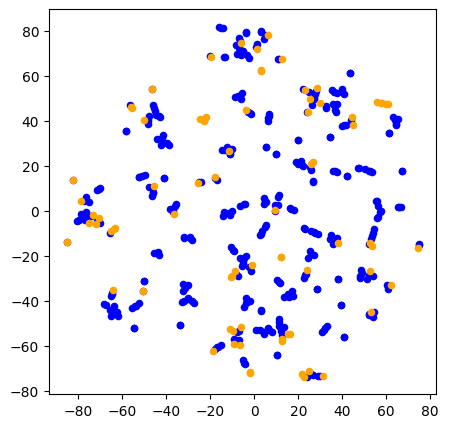

In [186]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(cluster0[:, 0], cluster0[:, 1], marker='o', c='blue', s=20)
plt.scatter(cluster1[:, 0], cluster1[:, 1], marker='o', c='orange', s=20)
plt.show()

혼동 행렬:
[[84  0]
 [ 7 19]]
f1_score:
0.8444444444444444


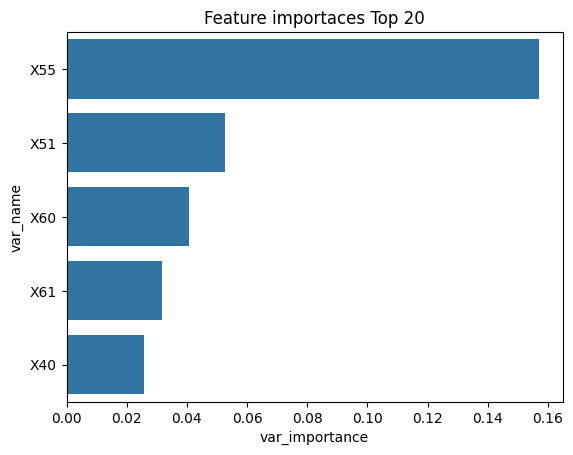

In [217]:
#(c)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score

clf = RandomForestClassifier(random_state=1, n_estimators = 100,
                                               ccp_alpha = 0.001,
                                              )  
clf.fit(X_train,Y_train)

preds_train = clf.predict(X_train)
preds = clf.predict(X_test)

conf_matrix = confusion_matrix(Y_test, preds)
print("혼동 행렬:")
print(conf_matrix)

f1 = f1_score(Y_test, preds)
print("f1_score:")
print(f1)

import matplotlib.pyplot as plt
import seaborn as sns

var_imp = pd.DataFrame({'var_name':X_train.columns , 'var_importance': clf.feature_importances_}) # 변수명과 해당 변수의 중요도 값을 데이터프레임 형태로 생성
imp_top5=var_imp.sort_values(by=['var_importance'],ascending=False)[:5] # 결과값 내림차순 정렬
imp_top5.head(n=5) # 상위값 10개만 출력
plt.figure
plt.title("Feature importaces Top 20")
sns.barplot(x=imp_top5["var_importance"], y=imp_top5["var_name"])
plt.show()

In [197]:
from imblearn.under_sampling import *
from imblearn.over_sampling import *
from imblearn.combine import *

In [218]:
X_TomekLinks,Y_TomekLinks = TomekLinks().fit_resample(X_train, Y_train)

print(f"제거된 data 수: {len(X_train) - len(X_TomekLinks)}")

제거된 data 수: 11


혼동 행렬:
[[84  0]
 [ 7 19]]
f1_score:
0.8444444444444444


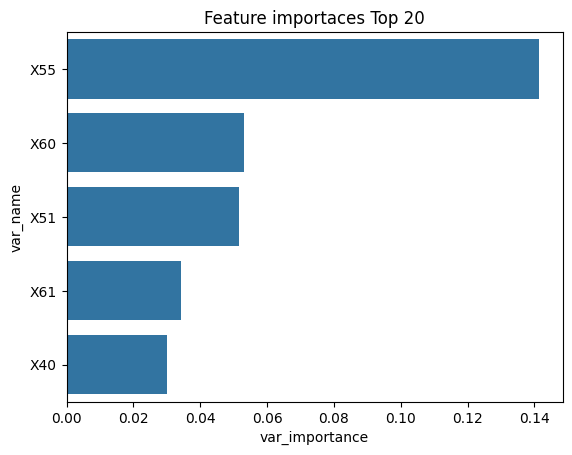

In [219]:
clf = RandomForestClassifier(random_state=1, n_estimators = 100,
                                               ccp_alpha = 0.001,
                                              )  
clf.fit(X_TomekLinks,Y_TomekLinks)

preds_train = clf.predict(X_TomekLinks)
preds = clf.predict(X_test)

conf_matrix = confusion_matrix(Y_test, preds)
print("혼동 행렬:")
print(conf_matrix)

f1 = f1_score(Y_test, preds)
print("f1_score:")
print(f1)

import matplotlib.pyplot as plt
import seaborn as sns

var_imp = pd.DataFrame({'var_name':X_train.columns , 'var_importance': clf.feature_importances_}) # 변수명과 해당 변수의 중요도 값을 데이터프레임 형태로 생성
imp_top5=var_imp.sort_values(by=['var_importance'],ascending=False)[:5] # 결과값 내림차순 정렬
imp_top5.head(n=5) # 상위값 10개만 출력
plt.figure
plt.title("Feature importaces Top 20")
sns.barplot(x=imp_top5["var_importance"], y=imp_top5["var_name"])
plt.show()

# 4번 문제